### Objective: Use consumer insights and business analytics to simulate a large dataset, analyze customer behavior, and provide actionable insights to optimize marketing strategies.

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Simulate Large Dataset
np.random.seed(42)  # For reproducibility
customer_ids = np.random.randint(1000, 5000, size=50000)
categories = ["Electronics", "Clothing", "Groceries", "Furniture", "Beauty", "Sports"]
purchase_channels = ["Online", "In-Store"]
locations = ["Urban", "Suburban", "Rural"]
age_groups = ["18-25", "26-35", "36-50", "51+"]

data = {
    "CustomerID": customer_ids,
    "AgeGroup": np.random.choice(age_groups, size=50000),
    "Category": np.random.choice(categories, size=50000),
    "Channel": np.random.choice(purchase_channels, size=50000),
    "Location": np.random.choice(locations, size=50000),
    "Quantity": np.random.randint(1, 10, size=50000),
    "Price": np.random.randint(50, 5000, size=50000),
}

df = pd.DataFrame(data)
df["Revenue"] = df["Quantity"] * df["Price"]

In [3]:
# Step 3: Summary of the Dataset
print("Dataset Overview:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

Dataset Overview:
   CustomerID AgeGroup   Category   Channel Location  Quantity  Price  Revenue
0        4174      51+  Groceries  In-Store    Urban         5   3972    19860
1        4507    26-35  Groceries  In-Store    Urban         9   3609    32481
2        1860    36-50     Beauty    Online    Urban         4   4956    19824
3        2294    18-25     Beauty    Online    Rural         7   3379    23653
4        2130    26-35  Groceries    Online    Urban         6   3399    20394

Summary Statistics:
         CustomerID      Quantity         Price       Revenue
count  50000.000000  50000.000000  50000.000000  50000.000000
mean    3004.888800      4.988300   2525.054820  12603.422420
std     1152.640272      2.573561   1426.841429  10326.701049
min     1000.000000      1.000000     50.000000     50.000000
25%     2007.000000      3.000000   1289.000000   4083.500000
50%     2997.000000      5.000000   2529.000000   9640.000000
75%     4005.000000      7.000000   3758.000000  1892

In [4]:
# Step 4: Customer Segmentation
# 4.1 Revenue by Age Group
age_group_revenue = df.groupby("AgeGroup")["Revenue"].sum()
print("\nRevenue by Age Group:")
print(age_group_revenue)


Revenue by Age Group:
AgeGroup
18-25    156849642
26-35    159177354
36-50    156734623
51+      157409502
Name: Revenue, dtype: int32


In [5]:
# 4.2 Revenue by Category
category_revenue = df.groupby("Category")["Revenue"].sum()
print("\nRevenue by Category:")
print(category_revenue)


Revenue by Category:
Category
Beauty         104762449
Clothing       105547341
Electronics    107458877
Furniture      103849096
Groceries      103687245
Sports         104866113
Name: Revenue, dtype: int32


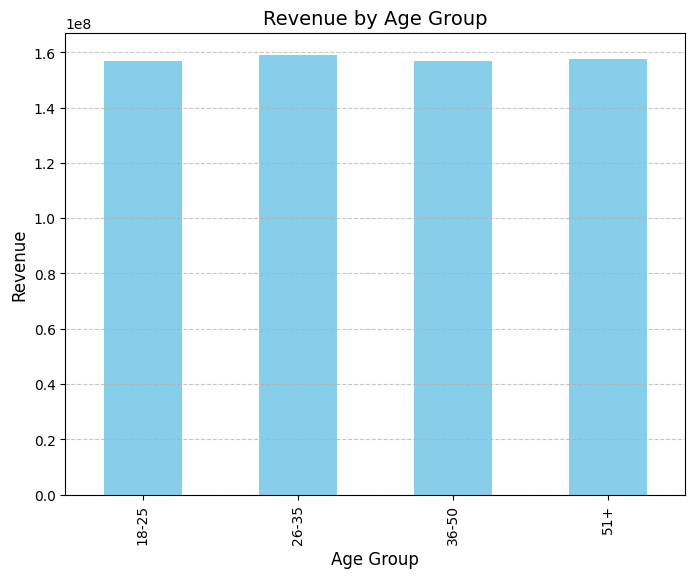

In [6]:
# Step 5: Visualizing Consumer Insights
# 5.1 Revenue by Age Group
plt.figure(figsize=(8, 6))
age_group_revenue.plot(kind="bar", color="skyblue")
plt.title("Revenue by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

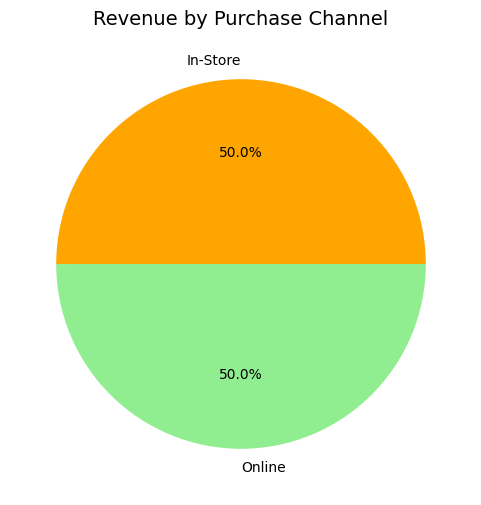

In [7]:
# 5.2 Revenue by Purchase Channel
channel_revenue = df.groupby("Channel")["Revenue"].sum()

plt.figure(figsize=(6, 6))
channel_revenue.plot(kind="pie", autopct='%1.1f%%', colors=["orange", "lightgreen"])
plt.title("Revenue by Purchase Channel", fontsize=14)
plt.ylabel("")
plt.show()

<Figure size 1200x600 with 0 Axes>

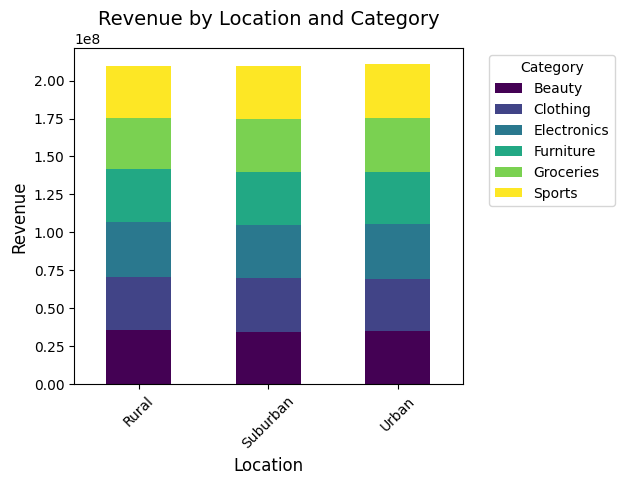

In [8]:
# Step 6: Behavioral Trends
# 6.1 Revenue by Location and Category
location_category_revenue = df.groupby(["Location", "Category"])["Revenue"].sum().unstack()

plt.figure(figsize=(12, 6))
location_category_revenue.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Revenue by Location and Category", fontsize=14)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [9]:
# Step 7: Actionable Insights
print("\nActionable Insights:")
print("- Age Group", age_group_revenue.idxmax(), "drives the most revenue. Target this group with tailored promotions.")
print("- The top-performing category is:", category_revenue.idxmax(), "suggesting it should receive higher inventory and marketing focus.")
print("- Online channels contribute", round((channel_revenue["Online"] / channel_revenue.sum()) * 100, 2), "% of the revenue. Invest in enhancing the online shopping experience.")
print("- Urban locations generate the highest revenue. Expand marketing campaigns and product availability in urban areas.")


Actionable Insights:
- Age Group 26-35 drives the most revenue. Target this group with tailored promotions.
- The top-performing category is: Electronics suggesting it should receive higher inventory and marketing focus.
- Online channels contribute 49.99 % of the revenue. Invest in enhancing the online shopping experience.
- Urban locations generate the highest revenue. Expand marketing campaigns and product availability in urban areas.
